In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

import math

In [3]:
#load the dataset
weather = pd.read_csv("data/weather.csv",index_col='DATE')

In [4]:
#select the columns from weather data
weather = weather[['TMAX', 'TMIN','PRCP']]
weather.head()

,TMAX,TMIN,PRCP
DATE,,,
1970-01-01,28,22,0.00
1970-01-02,31,22,0.00
1970-01-03,38,25,0.02
1970-01-04,31,23,0.00
1970-01-05,35,21,0.00


In [17]:
#fill all the null values
weather = weather.ffill()

In [18]:
#lower case all the column names
weather.columns = weather.columns.str.lower()
print(weather.columns)

Index(['tmax', 'tmin', 'prcp', 'tmax_tomorrow'], dtype='object')


In [19]:
#create a tmax_tomorrow
weather['tmax_tomorrow'] = weather.shift(-1)["tmax"]
weather.head()

,tmax,tmin,prcp,tmax_tomorrow
DATE,,,,
1970-01-01,28,22,0.00,31.0
1970-01-02,31,22,0.00,38.0
1970-01-03,38,25,0.02,31.0
1970-01-04,31,23,0.00,35.0
1970-01-05,35,21,0.00,36.0


In [9]:
weather.shape

(19289, 4)

In [23]:
#fill all the null values
weather = weather.ffill()

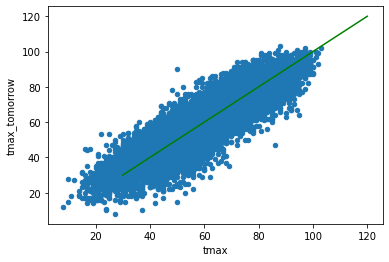

In [24]:
#plotting the columns
weather.plot.scatter("tmax","tmax_tomorrow")
plt.plot([30,120],[30,120],color='green')

$\hat{y} = w_{1}*x_{1} + b$

$\hat{y} = w_{1}*x_{1} + w_{2}*x_{2}+ b$

In [ ]:
#linear regression

In [25]:
lr = LinearRegression()
lr.fit(weather[['tmax']],weather['tmax_tomorrow'])

LinearRegression()

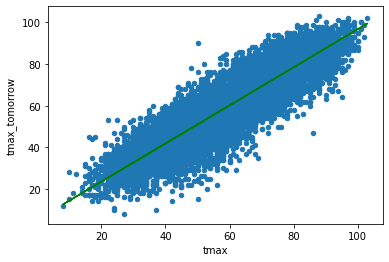

In [28]:
#plotting the data
weather.plot.scatter('tmax','tmax_tomorrow')
plt.plot(weather['tmax'],lr.predict(weather[['tmax']]),'green')

In [30]:
lr.coef_,lr.intercept_

(array([0.915205]), 5.243755513511715)

In [31]:
0.915205*80+5.243755513511715

78.46015551351172

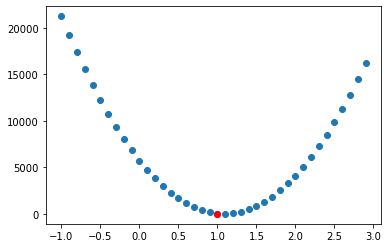

In [39]:
#loss function
loss = lambda w,y: ((w*70+5.243)-y)**2
y = 81

ws = np.arange(-1,3,.1)
losses = loss(ws,y)

plt.scatter(ws,losses)
plt.plot(1,loss(1,y),'ro')

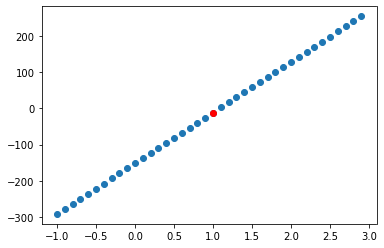

In [41]:
#gradient
gradient = lambda w,y: ((w*70+5.243)-y)*2
gradients = gradient(ws,y)

plt.scatter(ws,gradients)
plt.plot(1,gradient(1,y),'ro')

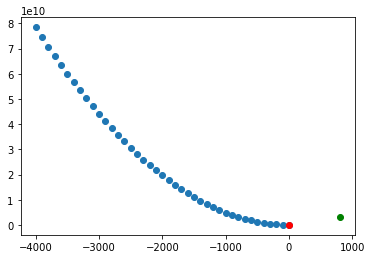

In [43]:
#backpropagation
ws = np.arange(-4000,100,100)
losses = loss(ws,y)

plt.scatter(ws,losses)

plt.plot(1,loss(1,y),'ro')
new_weight = 1 - gradient(1,y)*70

plt.plot(new_weight,loss(new_weight,y),'go')

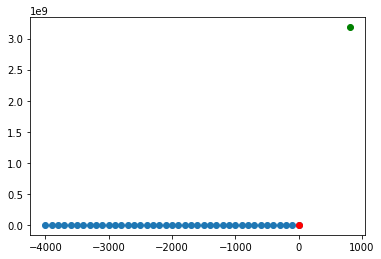

In [44]:
#backpropagation
ws = np.arange(-4000,100,100)
gradients = gradient(ws,y)

plt.scatter(ws,gradients)

plt.plot(1,gradient(1,y),'ro')
#new_weight = 1 - gradient(1,y)*70

plt.plot(new_weight,loss(new_weight,y),'go')

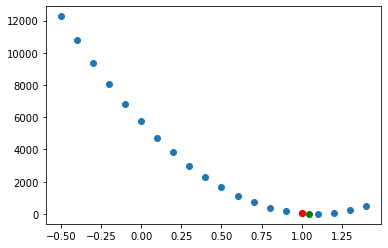

In [48]:
ws = np.arange(-.5,1.5,.1)

losses = loss(ws,y)
plt.scatter(ws,losses)

plt.plot(1,loss(1,y),'ro')

lr = 5e-5

new_weight =  1 - lr* gradient(1,y)*80

plt.plot(new_weight,loss(new_weight,y),'go')

In [49]:
new_weight

1.046056

In [63]:
## predictors and target
PREDICTORS = ["tmax","tmin","prcp"]
TARGET = "tmax_tomorrow"

In [64]:
#splitting the data into training, validating and testing
np.random.seed(0) #so that we could reproduce the same dataset again and again

split_data = np.split(weather, [int(.7 * len(weather)), int(.85*len(weather)) ])

(train_x,train_y),(validate_x,validate_y),(test_x,test_y) = [ [ d[PREDICTORS].to_numpy() ,d[[TARGET]].to_numpy() ] for d in split_data]

In [90]:
def init_params(predictors):
    np.random.seed(0)
    weights = np.random.rand(predictors,1) #initialize between 0 and 1
    
    biases = np.ones((1,1)) #more biases to predict multiple targets but in here its just one target
    
    return [weights,biases] 

In [91]:
init_params(3)

[array([[0.5488135 ],
        [0.71518937],
        [0.60276338]]),
 array([[1.]])]

In [93]:
def forward_pass(params,x):
    #make predictions using weights and biases
    weights,biases = params
    
    # w1*tmax + w2*tmin + w3*rain + b
    
    predictions = x @ weights + biases #@ matrix multiplication  
    
    return predictions

In [94]:
def mse(actual,predicted):
    return np.mean((actual - predicted)**2)

def mse_gradient(actual,predicted):
    return (predicted - actual)  #returns one error per row
    #actual derivative of mse is 2(actual - predicted)but its easier to get the gradient if not * by 2

In [95]:
def backward_pass(params ,x, lr, grad):
    #x1*grad, x2*grad, .. 
    w_grad = (x.T / x.shape[0]) @ grad 
    #x.shape[0] because of batch gradient descent cause we want to average the grad of entire data
    
    b_grad = np.mean(grad,axis=0)
    
    params[0] -= w_grad * lr
    params[1] -= b_grad * lr
    
    return params

In [96]:
lr = 1e-4
epochs = 100 #each time data is passed into the algorith

params = init_params(train_x.shape[1])


for i in range(epochs):
    predictions = forward_pass(params,train_x)
    
    grad = mse_gradient(train_y,predictions)
    
    params = backward_pass(params, train_x, lr, grad)
    
    if i%10 == 0:
        predictions = forward_pass(params,validate_x)
        val_loss = mse(validate_y,predictions)
        
        print(f"Epoch {i} loss: {val_loss}")

Epoch 0 loss: 56.38613283392072
Epoch 10 loss: 48.77841359874928
Epoch 20 loss: 48.67109023887324
Epoch 30 loss: 48.567339060922954
Epoch 40 loss: 48.467059321470245
Epoch 50 loss: 48.370132654930885
Epoch 60 loss: 48.27644476160176
Epoch 70 loss: 48.185885267941956
Epoch 80 loss: 48.09834759117967
Epoch 90 loss: 48.013728808597705


In [97]:
params

[array([[0.51004372],
        [0.59893852],
        [0.60098216]]),
 array([[1.00618176]])]